In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\Advertising.csv")

## EDA

In [3]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.shape

(200, 5)

In [5]:
df["Unnamed: 0"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

**Unnamed: 0 columns is looking like an index or serial no we are not going to need it in further analysis so we are gonna drop it**

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


if we look at the mean and standard deviation. The standard deviation has to be as low as possible in compare to mean but If we Look at the Tv Columns std is almost half of the mean and same in radio and newspaper column as well

In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no missing values in any columns

In [8]:
df.count()

Unnamed: 0    200
TV            200
radio         200
newspaper     200
sales         200
dtype: int64

<AxesSubplot:>

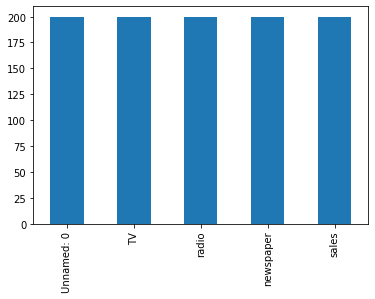

In [9]:
df.count().plot.bar()

There is no missing values in any columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


No categorical data. All are continues data

## Univariate Analysis

Dropping the Unnamed: 0 columns because it is not needed because it is index column

In [11]:
df.drop("Unnamed: 0",axis=1,inplace=True)

<AxesSubplot:ylabel='Frequency'>

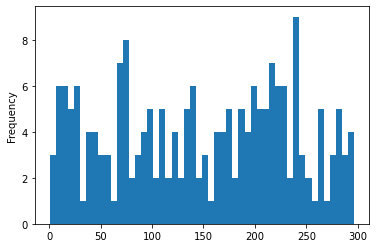

In [12]:
df["TV"].plot.hist(bins=50)

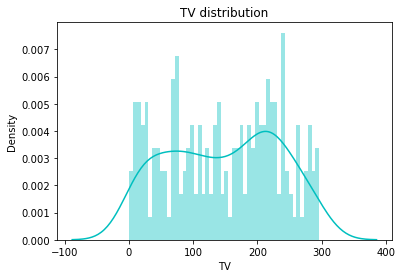

In [13]:
sns.distplot(df["TV"],bins=50,color='c')
plt.title("TV distribution")
plt.show()

Tv distribution looks like Normal distribution

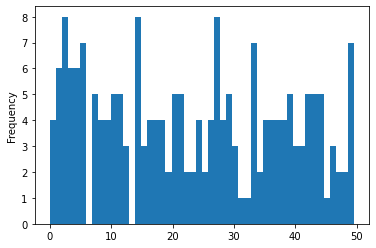

In [14]:
df["radio"].plot.hist(bins=50)
plt.show()

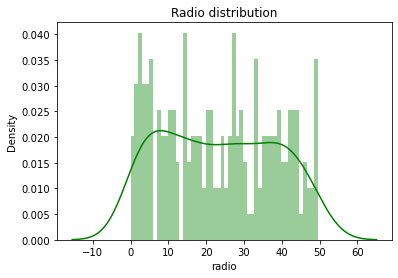

In [155]:
sns.distplot(df["radio"],bins=50,color='g')
plt.title("Radio distribution")
plt.show()

This is also look like Normally distributed. But we need to check for skewness and Outliers

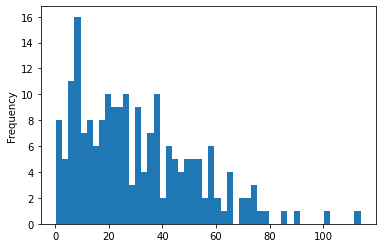

In [16]:
df["newspaper"].plot.hist(bins=50)
plt.show()

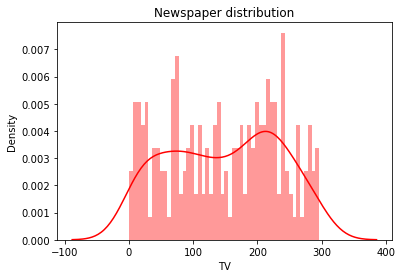

In [17]:
sns.distplot(df["TV"],bins=50,color='r')
plt.title("Newspaper distribution")
plt.show()

It seems to little skewed

## Bivariate Analysis

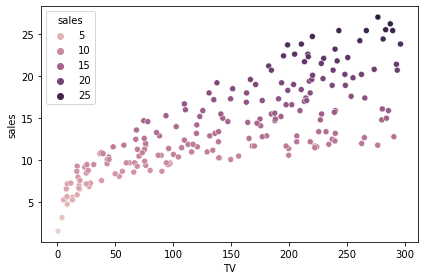

In [18]:
sns.scatterplot(df.TV,df.sales,hue=df['sales'])
plt.tight_layout()

It has a linear Relationship with the label columns

<AxesSubplot:xlabel='radio', ylabel='sales'>

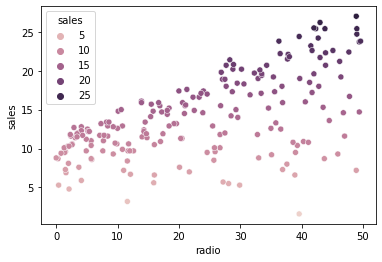

In [19]:
sns.scatterplot(df.radio,df.sales,hue=df['sales'])

Radio advertising also is has we can 70% relationship with Label columns

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

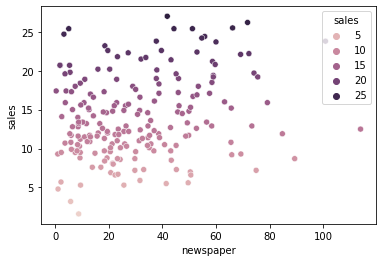

In [20]:
sns.scatterplot(df.newspaper,df.sales,hue=df['sales'])

This graph doesn't show any relation with Label. We need to confirm it.

<AxesSubplot:>

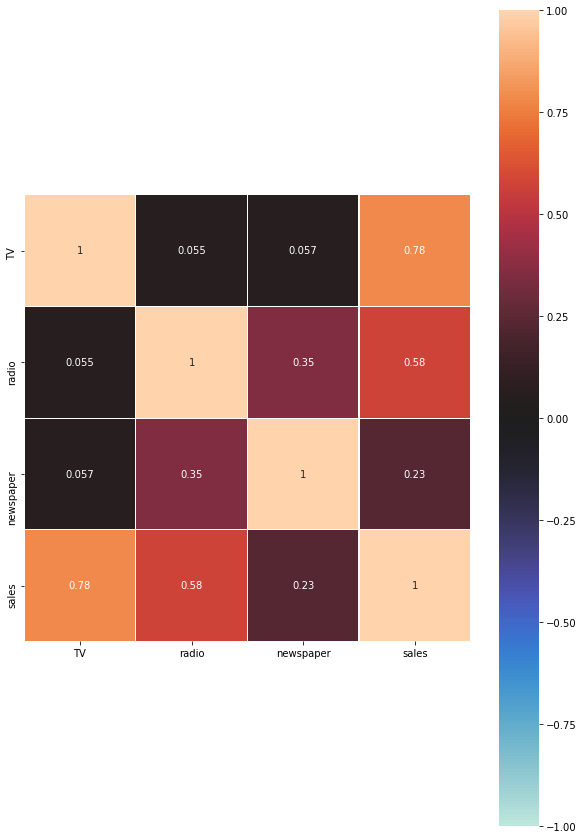

In [21]:
df_corr = df.corr().abs()
plt.figure(figsize=(10,15))
sns.heatmap(df_corr,vmax=1,vmin=-1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

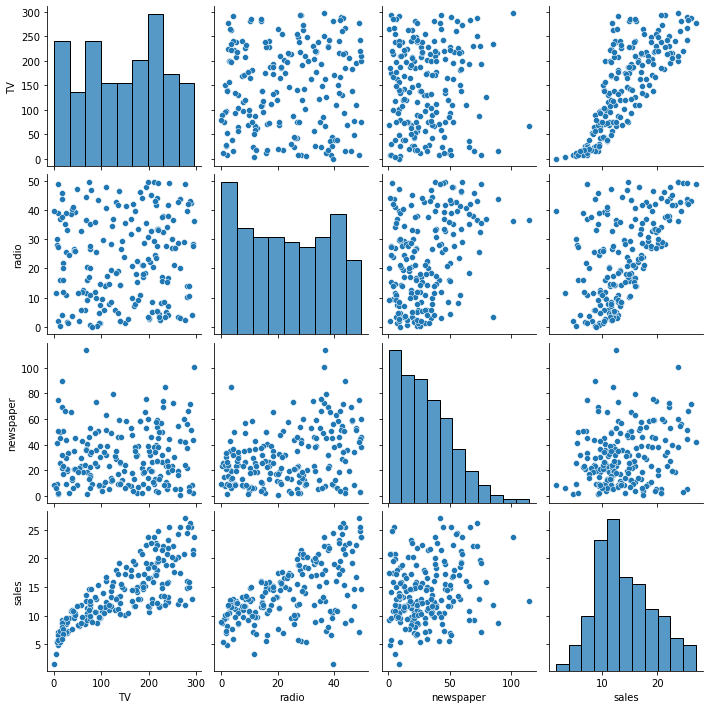

In [22]:
sns.pairplot(df)

From above both Graphs it's seem that this features has no Multicolinearity and Newspaper has the least relationship with the sales columns.

In [23]:
df.corr()["sales"].abs()

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

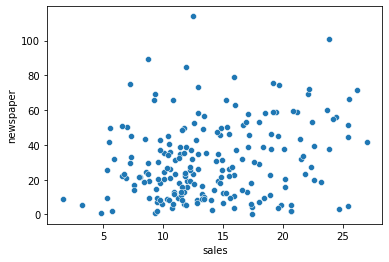

In [24]:
sns.scatterplot(df.sales,df.newspaper)

Confirming whether newspaper has any kind of relationship or not, Now it's clear that newspaper has no linear relationship with sales

In [25]:
# just confirming before going ahead that newspaper had any relationship with label or not
import statsmodels.formula.api as sm
lm1 = sm.ols(formula = 'sales~newspaper+TV+radio',data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        17:08:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From above test it is confirmed that the Newspaper has no relationship with the label

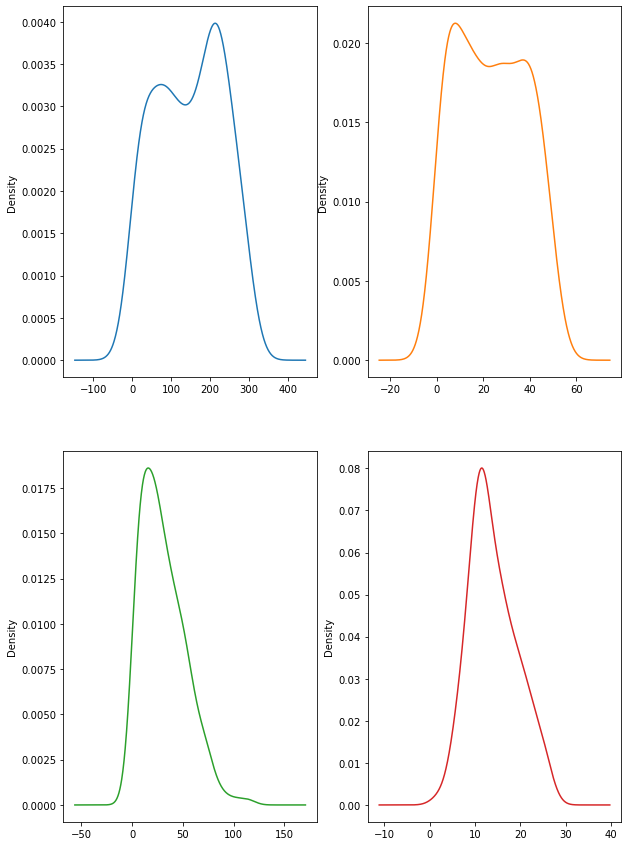

In [26]:
df.plot(kind="density",subplots=True,legend=False,sharex=False,layout=(2,2),figsize=(10,15),xlabel=["Tv","Radio","Newspaper","Sales"])
plt.show()

The data Distribution seems to be a Guassian distribution but still we need to check for Outliers and Skewness in the data

## Data Cleaning

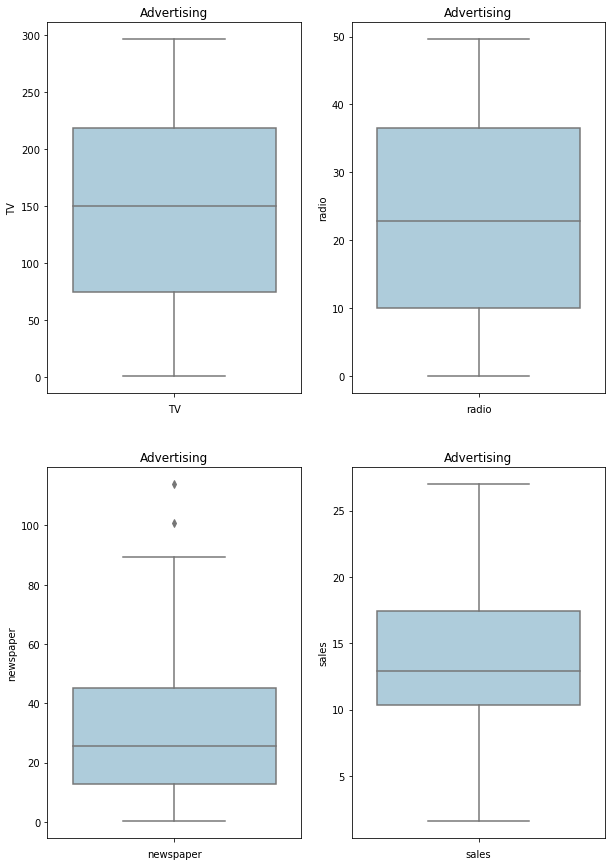

In [27]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in df:
    if plotnumber < 5:
        ax= plt.subplot(2,2,plotnumber)
        sns.boxplot(y=df[i],orient="v",data=df,palette="Paired")
        plt.title("Advertising")
        plt.xlabel(i)
        plotnumber+=1
plt.show()
        

Only Newspaper has some Outliers

In [28]:
from scipy.stats import zscore

In [29]:
z_score = zscore(df["newspaper"])
abs_z_score=np.abs(z_score)

In [31]:
filter=abs_z_score<3

In [32]:
filtered_entries = abs_z_score< 3
new_df = df[filtered_entries]
new_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
new_df.shape

(198, 4)

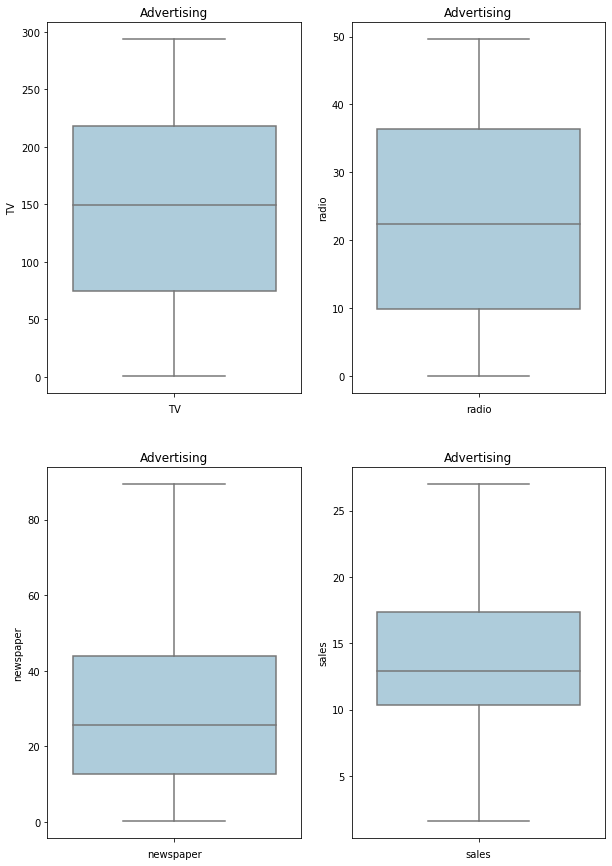

In [34]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in new_df:
    if plotnumber < 5:
        ax= plt.subplot(2,2,plotnumber)
        sns.boxplot(y=new_df[i],orient="v",data=new_df,palette="Paired")
        plt.title("Advertising")
        plt.xlabel(i)
        plotnumber+=1
plt.show()
        

so the outliers has been removed Using the zscore so i am not going to use or call any other method here.

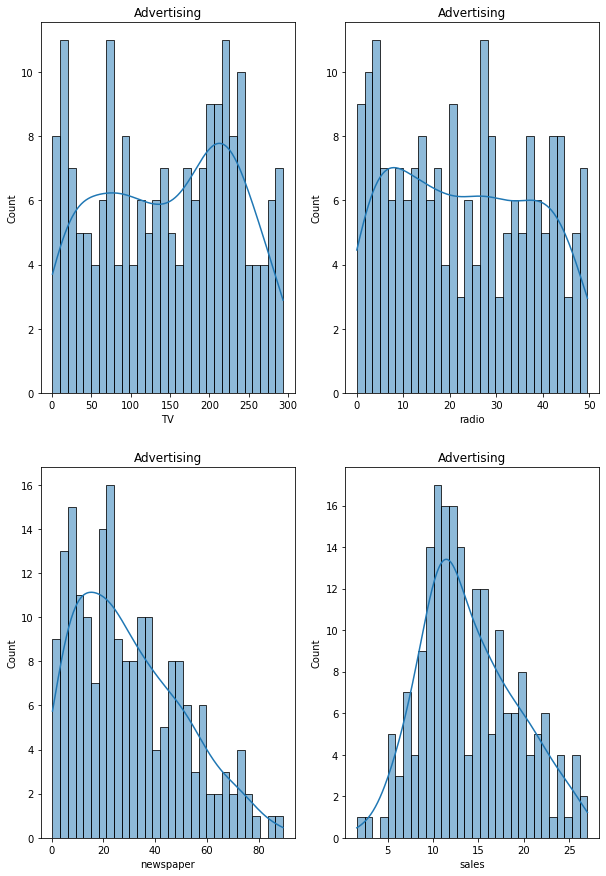

In [35]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in new_df:
    if plotnumber < 5:
        ax= plt.subplot(2,2,plotnumber)
        sns.histplot(new_df[i],kde=True,bins=30)
        plt.title("Advertising")
        plt.xlabel(i)
        plotnumber+=1
plt.show()
        

sales is normally distributed and having almost bell shape curve.

TV,Radio and newspaper is also look like Guassian Distribution.



In [36]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

There is skewness in the newspaper only

In [37]:
# Creating copy of new_df to check which is the good method to remove the skewnes
df1 = pd.DataFrame(new_df)

In [38]:
df1["newspaper"]=np.log(df1["newspaper"])

In [39]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper   -1.221802
sales        0.407130
dtype: float64

Log transformation method is not good to remove the skewness from newspaper columns so need to apply different method

In [40]:
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer()
new_df[["newspaper"]] = trans.fit_transform(new_df[["newspaper"]])

In [41]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.258348
sales        0.407130
dtype: float64

The Skewness in the newspaper is taken cared of

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [103]:
x = new_df.drop(columns=["sales","newspaper"],axis=1)
y= new_df["sales"]

In [104]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [105]:
max_accu = 0
max_RS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = r2_score(y_test,y_pred)
    if accu_score > max_accu:
        max_Rs = i
        max_accu = accu_score
print("Random state :",max_RS,"Best accuracy :",max_accu)

Random state : 0 Best accuracy : 0.939421533141918


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=0)

## Linear Regression

In [107]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
y_pred= lr.predict(x_test)

In [109]:
diff=[]
r2score=[]
cross=[]
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(lr,x_scaled,y,cv=5).mean())

R2 score : 0.9153824951773651 
 cross Validation score : 0.8877746326163092


In [110]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(lr,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(lr,x_scaled,y,cv=5).mean())
diff.append(r-cv)

## DecisionTree Regression

In [111]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [112]:
y_pred= dt.predict(x_test)

In [113]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(dt,x_scaled,y,cv=5).mean())

R2 score : 0.9691058817016027 
 cross Validation score : 0.9572565139638792


In [114]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(dt,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(dt,x_scaled,y,cv=5).mean())
diff.append(r-cv)

## Bagging Regression

In [115]:
bag_reg = BaggingRegressor()
bag_reg.fit(x_train,y_train)

BaggingRegressor()

In [116]:
y_pred= bag_reg.predict(x_test)

In [117]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cross_val_score(bag_reg,x_scaled,y,cv=5).mean())

R2 score : 0.9800858214042198 
 cross Validation score : 0.9740600235437136


In [118]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(bag_reg,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(bag_reg,x_scaled,y,cv=5).mean())
diff.append(r-cv)

## GradientBoosting Regression

In [119]:
gbt= GradientBoostingRegressor()
gbt.fit(x_train,y_train)

GradientBoostingRegressor()

In [120]:
y_pred= bag_reg.predict(x_test)

In [121]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cross_val_score(gbt,x_scaled,y,cv=5).mean())

R2 score : 0.9800858214042198 
 cross Validation score : 0.9788206443426247


In [122]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(gbt,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(gbt,x_scaled,y,cv=5).mean())
diff.append(r-cv)

## AdaBoost Regression

In [123]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(x_train,y_train)

AdaBoostRegressor()

In [124]:
y_pred= ada_reg.predict(x_test)

In [125]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cross_val_score(ada_reg,x_scaled,y,cv=5).mean())

R2 score : 0.960658676892149 
 cross Validation score : 0.9533513643328264


In [126]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(ada_reg,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(ada_reg,x_scaled,y,cv=5).mean())
diff.append(r-cv)

## KNN

In [127]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [128]:
y_pred= knn.predict(x_test)

In [129]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cross_val_score(knn,x_scaled,y,cv=5).mean())

R2 score : 0.9814265694519148 
 cross Validation score : 0.9665187315316064


In [130]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(knn,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(knn,x_scaled,y,cv=5).mean())
diff.append(r-cv)

## SVR

In [131]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [132]:
y_pred= knn.predict(x_test)

In [133]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cross_val_score(svr,x_scaled,y,cv=5).mean())

R2 score : 0.9814265694519148 
 cross Validation score : 0.9542353126936345


In [134]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(svr,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(svr,x_scaled,y,cv=5).mean())
diff.append(r-cv)

#### Creating a Dataframe to compare all the model 

In [135]:
model = ["Linear Regression","Decision Tree Regression","Bagging Regression","GradientBoosting Regression","AdaBoost Regression","KNN","SVR"]

In [136]:
Before= pd.DataFrame({"Model":model,
                   "R2 score":r,
                   "Cross validation score":cv,
                   "Difference":diff})
Before

,Model,R2 score,Cross validation score,Difference
0,Linear Regression,0.981427,0.954235,0.027608
1,Decision Tree Regression,0.981427,0.954235,0.014057
2,Bagging Regression,0.981427,0.954235,0.002342
3,GradientBoosting Regression,0.981427,0.954235,0.001248
4,AdaBoost Regression,0.981427,0.954235,0.004012
5,KNN,0.981427,0.954235,0.014908
6,SVR,0.981427,0.954235,0.027191


I removed the Newspaper column because it affect the accuracy of the model and moreover it does not have any relationship with label

### After Removing Newspaper features the accuracy increses suddenly. And we have prove with the Hypothesis testing that Newspaper has no relation with sales. Therefore dropping that column won't do any harm



**With out Removing Newspaper the accuracy is** :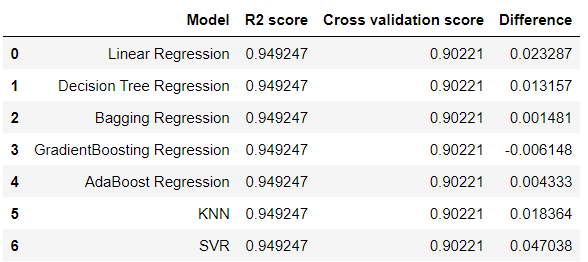

Gradient Boosting Regressor is my Best Model so tunning it

In [145]:
params = {"criterion":["friedman_mse", "mse", "mae"],
          "n_estimators":list(range(100,600,100)),
          "learning_rate":list(np.arange(0.0001,1,0.001)),
          "max_depth":list(range(3,40,2)),
          "min_samples_split":range(1,20,2),
          "min_samples_leaf":range(1,20,2),
          'random_state':range(0,20,2)
         }

In [146]:
rand_search = RandomizedSearchCV(gbt,param_distributions=params,cv=3)

In [147]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.0001, 0.0011,
                                                          0.0021, 0.0031,
                                                          0.0041, 0.0051,
                                                          0.0061, 0.0071,
                                                          0.0081, 0.0091,
                                                          0.0101,
                                                          0.011099999999999999,
                                                          0.0121, 0.0131,
                                                          0.0141,
                                                          0.015099999999999999,
                                                          0.0

In [148]:
rand_search.best_params_

{'random_state': 16,
 'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_depth': 13,
 'learning_rate': 0.0311,
 'criterion': 'friedman_mse'}

In [149]:
gbt = GradientBoostingRegressor(random_state=16,n_estimators= 500,min_samples_split= 5,min_samples_leaf=9, max_depth=13,learning_rate = 0.0311,criterion='friedman_mse')

In [150]:
gbt.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.0311, max_depth=13,
                          min_samples_leaf=9, min_samples_split=5,
                          n_estimators=500, random_state=16)

In [151]:
y_pred = gbt.predict(x_test)

In [152]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cross_val_score(gbt,x_scaled,y,cv=5).mean())

R2 score : 0.9800587623485764 
 cross Validation score : 0.9748992399761143


## Saving the Model

In [153]:
import pickle

# save the model to disk

filename = 'Advertising.pk1'
pickle.dump(gbt, open(filename, 'wb'))

In [154]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
